# Aufgabe 1

## Importe

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

## Variablen

In [3]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## a) Preparing Dataset (MNIST/Tensorflow)

### Get dataset and prepare train and test sets

In [4]:
# Grab the MNIST dataset
# The dataset is already split into train and test set (with distribution train:60k to test:10k)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the FFN
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
[5 0 4 ... 5 6 8]


### Encode data

In [6]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## b) Feed forward network
Da wir nicht wissen wie unser neuronales Netz für verschiedene Activation Functions performt, probieren wir im Folgenden die Gängigsten.

In [7]:
# Set of activation Functions
# Softmax and exponential activation functions are not working in this setup therefore they are not included in this list
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"]

In [8]:
# define the 784-256-128-10 architecture with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    model.add(Dense(128, activation=ac))
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


In [9]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
                  metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
                  epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.1831 - accuracy: 0.7138 - val_loss: 0.5687 - val_accuracy: 0.8660

## c) Evaluation

In [10]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # plot the training loss
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.96      0.95       982
           5       0.96      0.93      0.95       892
           6       0.95      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.96      0.93      0.95       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000



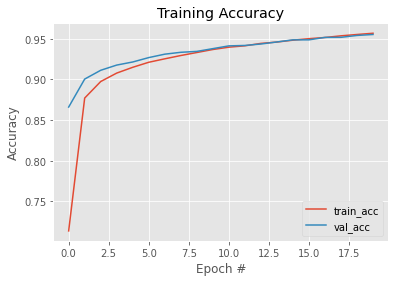

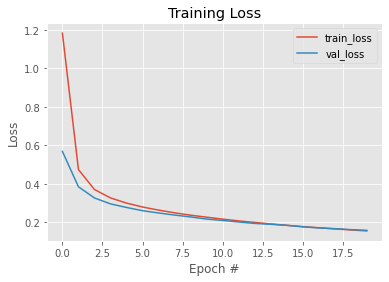


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.92      0.97      0.95      1135
           2       0.88      0.85      0.87      1032
           3       0.83      0.87      0.85      1010
           4       0.84      0.88      0.86       982
           5       0.83      0.74      0.79       892
           6       0.89      0.92      0.91       958
           7       0.90      0.89      0.89      1028
           8       0.86      0.79      0.82       974
           9       0.83      0.82      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



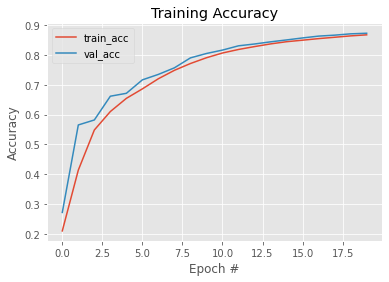

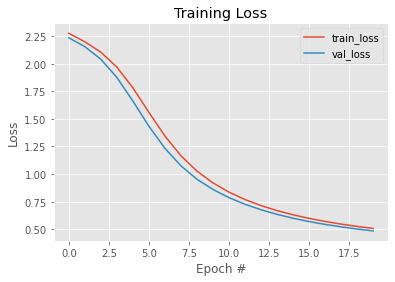


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.90      0.91       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.91      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



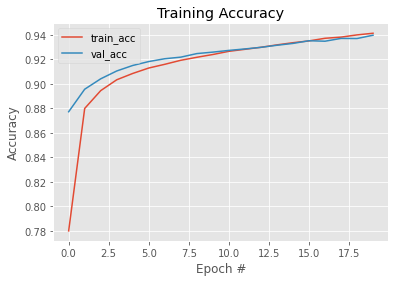

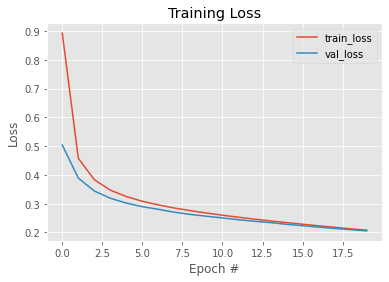


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.89      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.91      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



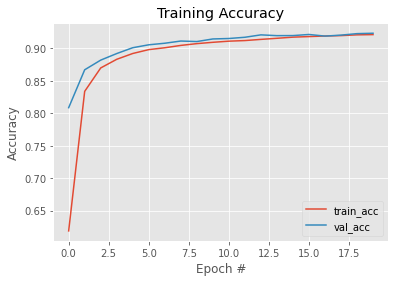

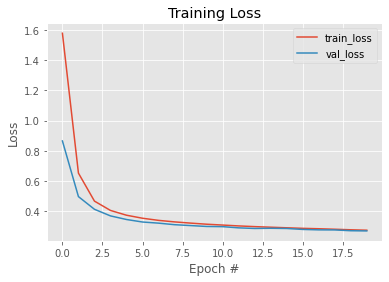


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.91      0.92      1032
           3       0.91      0.92      0.92      1010
           4       0.92      0.95      0.93       982
           5       0.92      0.89      0.91       892
           6       0.94      0.95      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.91      0.90       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



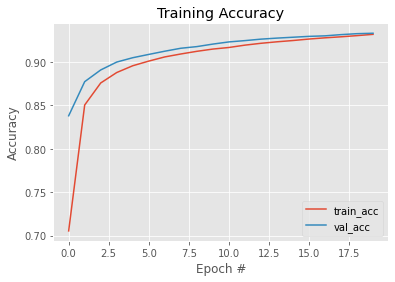

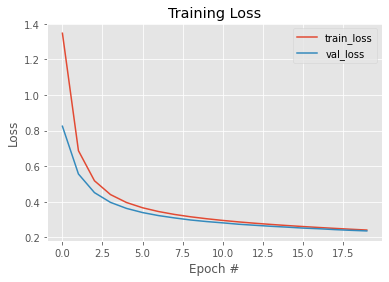


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.94      0.91      0.93       892
           6       0.95      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



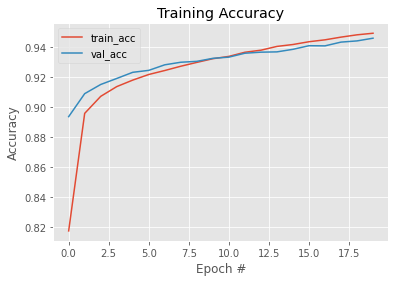

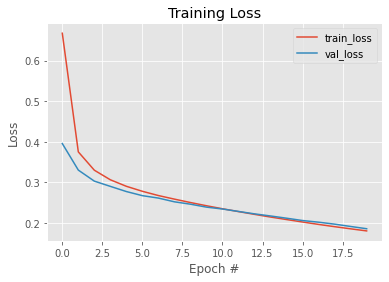


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.92      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.91      0.92      0.92       892
           6       0.95      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



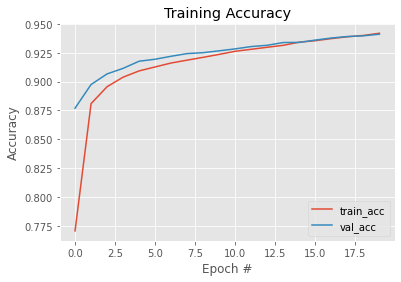

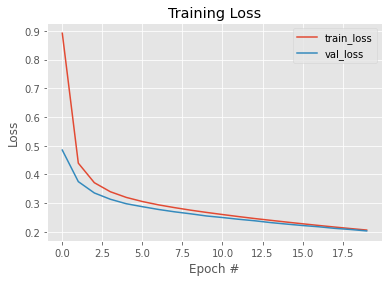

In [11]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
                                predictions.argmax(axis=1),
                                target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)

## d) Trend in train and test accuracies over the epochs
Mit Hilfe der Plots kann man erkennen, dass sich mit jeder Epoche die zusätzlich trainiert wird, die Accuracy, sowohl für die Trainingsdaten als auch für die Testdaten, verbessert. Zudem ist zu beobachten, dass sich mit fortschreitendem Training die Diskrepanz der Accuracy der Trainings- und Testdaten verringert, sodass diese beiden Werte nach 20 Epochen nahezu gleich sind. Dieses Verhalten ist für die unterschiedlichen Aktivierungsfunktionen ähnlich. Außerdem zeigt die Untersuchung der verschiedenen Aktivierungsfunktionen, dass das Modell, je nach Aktivierungsfunktion, unterschiedlich gut performt. Wir beschränken unsere Betrachtung im Folgenden auf die Aktivierungsfunktionen 'relu' und 'sigmoid'.

## e) How can you measure the complexity of an ANN?
Die Komplexität eines ANNs hängt im Prinzip von drei Faktoren ab. So ist einerseits die Tiefe des Netzwerks, also die Anzahl der verborgenen Schichten, andererseits aber auch die Breite des Netzwerks, also die Anzahl der einzelnen Neuronen innerhalb der einzelnen Schichten ausschlaggebend. Zudem kommt noch, dass verschiedene Aktivierungsfunktionen, Loss-Funktionen und gradiend-decent-varianten zur Komplexität beitragen.

Eine konkrete Möglichkeit um die Komplexität zu messen bietet die „Vapnik–Chervonenkis dimension“.

## f) What is overfitting? Explain it briefly.
Overfitting bedeutet, dass ein Model sich übermäßig stark an einen gegebenen Trainingsdatensatz anpasst, sodass das Model zwar die Daten dieses Datensatzes mit sehr hoher Genauigkeit  vorhersagen kann, jedoch für neue, unbekannte Daten wie z.B. einen Testdatensatz nicht funktioniert. Das Modell hat sozusagen den gegebenen Datensatz auswendig gelernt, anstatt von diesem Erkenntnisse über die Daten selbst und deren Zusammenhänge zu ziehen, welche für die Einteilung und Vorhersage unbekannter, neuer Daten notwendig wären.
Somit ist eine Übertragung des Modells auf die Grundgesamtheit (Generalisierung) nicht mehr möglich, was letztendlich in minderer Genauigkeit resultiert.

Das Problem des Overfittings tritt dann auf, wenn ein Modell entweder zu lange auf einem Datensatz trainiert wird, der Datensatz für das Modell zu klein ist oder die Auswahl der Trainingsdaten mit einem Bias verzerrt ist.

## g)
Wir betrachten nun ein ähnliches neuronales Netzwerk wie in den vorherigen Teilaufgaben. Anders ist hier nun, dass wir mit einem Netzwerk ohne Hidden Layers beginnen und diese Schritt für Schritt hinzufügen. Wir betrachten anschließend, jeweils für die Trainings- sowie die Testdaten, die Accuracy entsprechend der Epoche für jede der Netzwerkvarianten.  

Daten:  
Aktivierungsfunktion: Sigmoid und ReLU  
Neuronen pro erweiterter Schicht: 128  
Startnetzwerk: 784-256-10  
Erweiterung: eine Schicht pro Schritt

In [12]:
def getLayerSize(layer_number: int):
    return 128
    # Constant at the moment
    assert layer_number > 0
    if layer_number < 5:
        return 2**(8-layer_number)
    else:
        return 16


In [13]:
def buildModel(numHiddenLayers: int, ac):
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=ac))
    for i in range(numHiddenLayers):
        model.add(Dense(getLayerSize(i), activation= ac))
    model.add(Dense(10, activation="softmax"))
    return model

In [14]:
max_hidden_layers = 10
def increaseLayers(ac = "sigmoid"):
    histories = []
    for i in range(max_hidden_layers):
        model = buildModel(i, ac)
        model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
        H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
        histories.append((H, i))
    return histories

In [15]:
print("[INFO] training network with sigmoid activation")
hist_s = increaseLayers()

print("[INFO] training network with relu activation")
hist_r = increaseLayers("relu")

[INFO] training network with sigmoid activation
[INFO] training network with relu activation


In [16]:
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, max_hidden_layers)]

def plotHistory(histories):
    plt.style.use("ggplot")
    plt.figure()
    for i in range(len(histories)):
        history, rep = histories[i]
        plt.plot(np.arange(0, epochs), history.history["accuracy"], color=colors[i], label="train_acc" + str(rep))
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], color=colors[i], label="val_acc" + str(rep), linestyle="dotted")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", ncol=2)
    plt.show()

[INFO] evaluating network with sigmoid activation


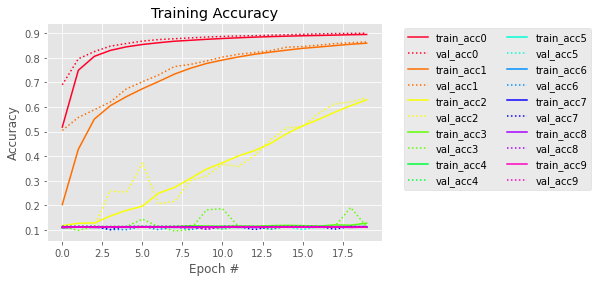

[INFO] evaluating network with relu activation


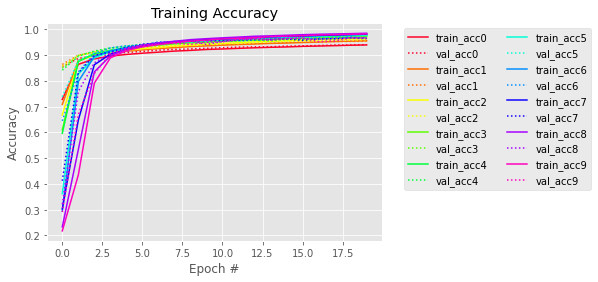

In [17]:
print("[INFO] evaluating network with sigmoid activation")
plotHistory(hist_s)
print("[INFO] evaluating network with relu activation")
plotHistory(hist_r)

Relu hat die Erwartung, dass mit zunehmender Komplexität die Accuracy besser wird bestätigt, wohingegen für sigmoid das Gegenteil eingetreten ist. Ein möglicher Grund könnte hierfür sein, dass die 20 Epochen Training nicht ausreichen um ein komplexeres Netzwerk zu trainieren. Dies ist insbesondere an der gelben Kurve ersichtlich.

### Overfitting und Generalisierung
Zu erwarten wäre eigentlich, dass mit zunehmender Komplexität des Netzwerks, bessere Accuracy Werte für die Trainingsdaten und schlechtere für die Testdaten erzeugt werden, da ein größeres bzw. komplexeres Netz eher in der Lage ist die Trainingsdaten vollständig zu lernen (overfitting) und dann nicht mehr generalisieren kann.

Hier ist es aber der Fall, dass die Accuracy insgesamt schlechter wird, wenn wir dem Netzwerk Hidden Layers hinzufügen und somit dessen Komplexität erhöhen (sigmiod) bzw. dass die Accuracy insgesamt besser wird je größer das Netzwerk wird (relu).

## h)
### Batch-Gradient-Decent
Beim Batch Gradient Descent werden, um einen einzigen Schritt zu machen, alle Trainingsdaten berücksichtigt. Man berechnet den Durchschnitt der Gradienten aller Trainingsdaten und verwenden dann diesen mittleren Gradienten, um die Parameter zu aktualisieren. Es gibt daher also nur einen Schritt des Gradientenabstiegs in einer Epoche.
#### Pro:
- Es kann eine feste Lernrate verwendet werden
- Stabilerer Konvergenz- und Fehlergradient als bei Stochastic-Gradient-Descent
- Nutzt die Vorteile der Vektorisierung
- Es wird ein direkterer Weg zum Minimum gefunden
- Konvergiert sicher in der Theorie
- Recheneffizient, da Aktualisierungen erst nach dem Durchlauf einer Epoche erforderlich sind

#### Con:
- Kann an lokalen Minima und Sattelpunkten konvergieren
- Langsameres Lernen, da ein Update erst durchgeführt wird, nachdem alle Beobachtungen durchgegangen wurden

### Mini-Batch-Gradient-Decent
Im Gegensatz zum Batch-Gradient-Descent-Algorithmus welcher über alle Beobachtungen bei jeder Iteration summiert, summiert Mini-Batch-Gradient-Descent bei jeder Iteration nur über eine geringere Anzahl von Samples (ein Mini-Batch der Samples). Diese Variante reduziert die Varianz des Gradienten, da für jedes Update nur über einen bestimmte Anzahl der Proben, abhängig von der Mini-Batch-Größe, summiert wird.
#### Pro:
- Konvergenz ist stabiler als bei Stochastic-Gradient-Decent
- Recheneffizient
- Schnelles Lernen, da mehr Updates durchgeführt werden
- Bei batch size < training set fügt es dem Lernprozess Rauschen hinzu, was hilft den Generalisierungsfehler zu verbessern
- Schneller als die Batch-Version, da hier viel weniger Samples durchlaufen werden
#### Con:
- Es muss der Hyperparameter für die Mini-Batch-Größe konfiguriert werden.
- Bei jeder Iteration kann der Lernschritt aufgrund des Rauschens hin und her gehen und wandert um den minimalen Bereich herum, konvergiert jedoch nie.
- Aufgrund des Rauschens weisen die Lernschritte mehr Oszillationen auf und erfordern, dass, bei Annäherung an das Minimum, die Lernrate abnimmt

### Stochastic-Gradient-Decent
Anstatt alle Samples durchzugehen, führt der Stochastic-Gradient-Decent-Algorithmus die Parameteraktualisierung für jedes Sample durch.

#### Pro:
- Die häufigen Aktualisierungen erzeugen viele Schwingungen, die hilfreich sein können, um lokale Minima zu verlassen.
- Nur eine einzige Beobachtung wird vom Netzwerk verarbeitet, was somit Speichereffizienter ist
- Kann bei einem großen Datensatz schneller in die Nähe des Minimums kommen als Batch-Gradient-Decent

#### Con:
- Es gehen die Vorteile der Vektorisierung verloren, da nur eine Beobachtung pro Zeit verarbeitet wird
- Kann durch häufige Updates in die falsche Richtung gehen
- Häufige Aktualisierungen sind rechenintensiv



## i) What is backpropagation?
Backpropagation ist eine Methode zur Feinabstimmung der Gewichte eines neuronalen Netzes basierend auf der Fehlerrate, die sich durch das training der vorherigen Epoche ergab, mit dem Ziel eben diese Fehlerrate zu minimieren.

Die Backpropagation besteht aus folgenden Schritten:
1. Fehler-Berechnung durch Abgleich der Soll-Werte mit den Prädiktionen in der Ausgabeschicht (Output-Layer)
2. Fehler-Rückführung zu den Neuronen der verborgenden Schichten (Hidden-Layers)
3. Anpassung der Gewichte entgegen des Gradientenanstiegs der Fehlerfunktion (Loss Function)

Das Rückführen der Fehler und die anschließende Addition mit den Gewichten führt dann letztendlich dazu, dass die Fehlerrate iterativ, mit jedem durchlaufenen Trainingsschritt, minimiert und die Genauigkeit des Modells erhöht wird.